# Ukázka do diplomové práce

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

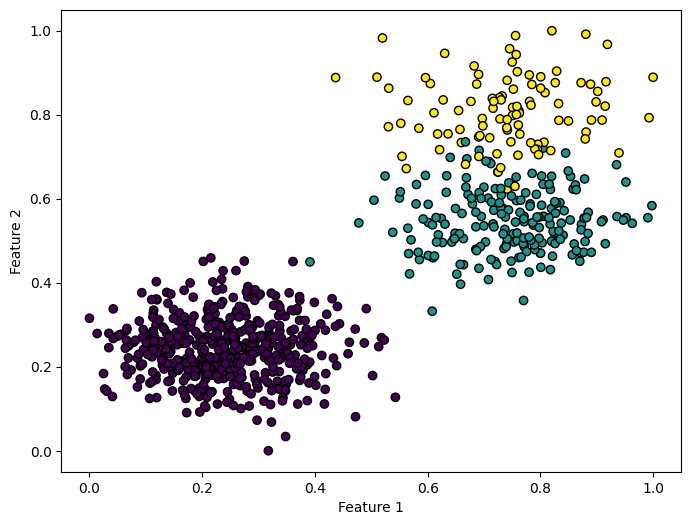

In [36]:
n_samples = 300

X, y = make_blobs(n_samples=[100,200,500], cluster_std=2.5, random_state=8)
y = y+10
y[y==10] = 2
y[y==11] = 1
y[y==12] = 0

X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [37]:
def cluster_data(X, n_clusters):
    """
    Reduce data size using K-means clustering.

    Parameters:
    - X (DataFrame): Features.
    - n_clusters (int): Number of clusters.

    Returns:
    - DataFrame: Reduced features.
    """

    col_names = X.columns[:-1]

    X_reduced = pd.DataFrame()
    y_reduced = X.target.unique().astype(int)

    y = X.target
    X = X.drop(['target'], axis=1)

    for index,label in enumerate(y_reduced):

        model = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=1).fit(X[y==label])

        X_reduced = pd.concat([X_reduced, pd.DataFrame(model.cluster_centers_,columns=col_names)], axis=0)

    y_reduced = np.repeat(y_reduced,n_clusters)

    X_reduced['target'] = y_reduced

    return X_reduced

In [38]:
Xy = np.column_stack((X, y))
Xy = pd.DataFrame(Xy, columns=['Feature 1', 'Feature 2', 'target'])

Xy_clustered = cluster_data(Xy, n_clusters=5)

y_clustered = Xy_clustered['target'].values
X_clustered = Xy_clustered.drop('target', axis=1).values

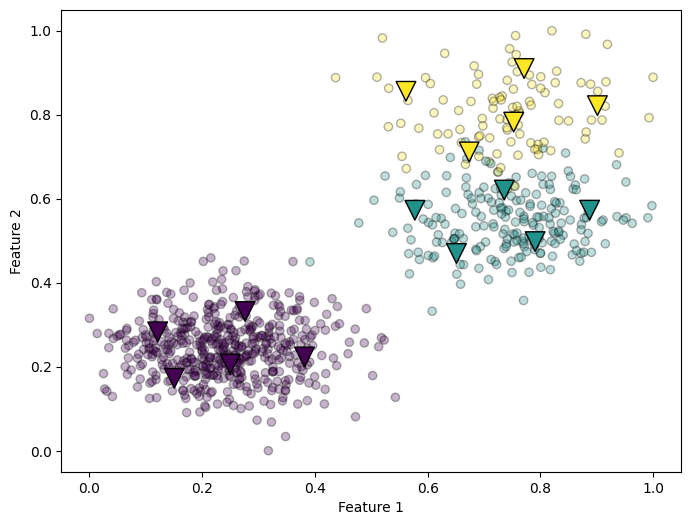

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.3, label='Data')
plt.scatter(X_clustered[:, 0], X_clustered[:, 1], c=y_clustered, cmap='viridis', edgecolors='k', marker='v', s=200, label='Těžiště')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Měření času CPU vs GPU

In [40]:
INPUT_PATH = '../../../Results/Clustering_Features/'

df_CPU = pd.read_csv(f'{INPUT_PATH}FoI_C_Xy_CPU_PoC_times.csv')
df_GPU = pd.read_csv(f'{INPUT_PATH}FoI_C_Xy_GPU_PoC_times.csv')

In [41]:
df_CPU

,n_clusters,mean,std
0,1,0.829292,0.226564
1,2,1.065092,0.072767
2,3,1.543782,0.394204
3,6,2.267507,1.247295
4,10,3.044616,1.150300
5,15,3.035174,0.836780
6,25,4.246493,0.813961
7,39,6.553764,2.124709
8,63,14.119874,4.198277
9,100,19.860081,7.636636


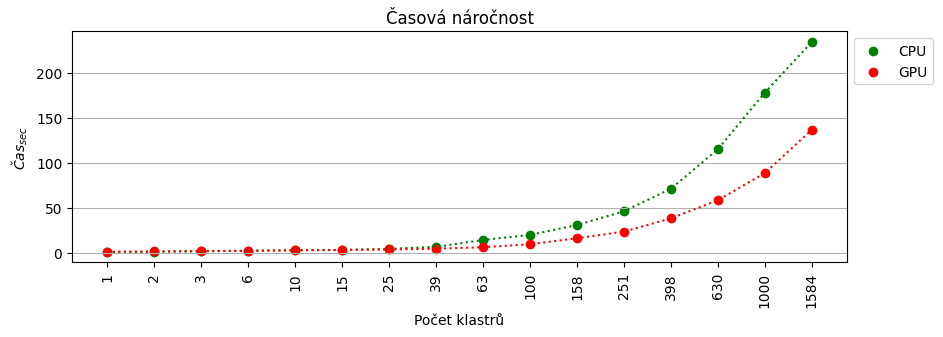

In [42]:
plt.figure(figsize=(10,3))

# CPU
plt.plot(df_CPU[f'mean'], color='green', linestyle=':')
plt.scatter(list(df_CPU.index), df_CPU[f'mean'], marker='o', color='green', label='CPU')

# GPU
plt.plot(df_GPU[f'mean'], color='red', linestyle=':')
plt.scatter(list(df_GPU.index), df_GPU[f'mean'], marker='o', color='red', label='GPU')

# Settings
plt.title('Časová náročnost')
plt.xlabel('Počet klastrů')
plt.ylabel('$Čas_{sec}$')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.xticks(list(df_CPU.index), labels=list(df_CPU['n_clusters'].values))
plt.tick_params(axis='x', rotation=90)

plt.savefig(f'{INPUT_PATH}times.png')
plt.show()

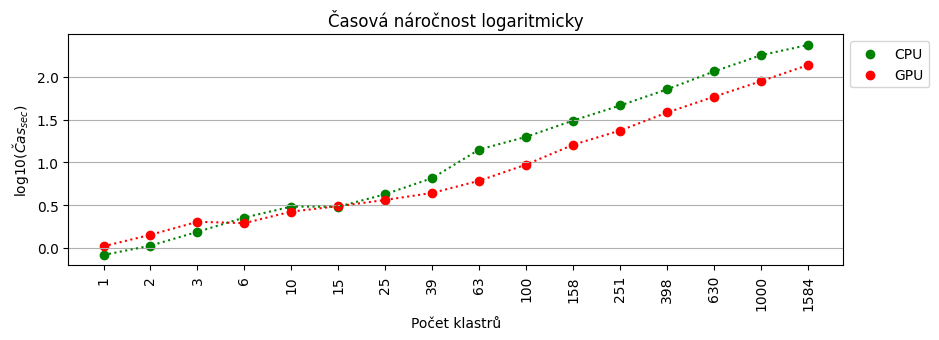

In [43]:
plt.figure(figsize=(10,3))

# CPU
plt.plot(np.log10(df_CPU[f'mean']), color='green', linestyle=':')
plt.scatter(list(df_CPU.index), np.log10(df_CPU[f'mean']), marker='o', color='green', label='CPU')

# GPU
plt.plot(np.log10(df_GPU[f'mean']), color='red', linestyle=':')
plt.scatter(list(df_GPU.index), np.log10(df_GPU[f'mean']), marker='o', color='red', label='GPU')

# Settings
plt.title('Časová náročnost logaritmicky')
plt.xlabel('Počet klastrů')
plt.ylabel('log10($Čas_{sec}$)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.xticks(list(df_CPU.index), labels=list(df_CPU['n_clusters'].values))
plt.tick_params(axis='x', rotation=90)

plt.savefig(f'{INPUT_PATH}times_log.png')
plt.show()